In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

#print file path that includes in certain directory
import os
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.filterwarnings('ignore')

./data/test.csv
./data/train.csv


In [2]:
df_test = pd.read_csv("./data/test.csv")

In [3]:
df_train = pd.read_csv("./data/train.csv")

In [4]:
df_test.shape


(270, 16)

In [5]:
df_train.shape

(301, 17)

In [6]:
df_train.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,title,first_artists,all_artists,like
0,0.486,0.881,2,-5.623,0,0.0474,0.024400,0.000000,0.429,0.6670,144.997,480707,4,A Little Piece of Heaven,Avenged Sevenfold,['Avenged Sevenfold'],1
1,0.356,0.960,4,-3.487,1,0.1040,0.014200,0.000000,0.209,0.0857,125.921,204733,4,Helena,My Chemical Romance,['My Chemical Romance'],1
2,0.487,0.949,2,-4.217,0,0.0798,0.000429,0.000029,0.231,0.4060,110.020,352427,4,Afterlife,Avenged Sevenfold,['Avenged Sevenfold'],1
3,0.366,0.963,11,-5.301,0,0.1420,0.000273,0.012200,0.115,0.2110,137.114,366213,4,Knights of Cydonia,Muse,['Muse'],1
4,0.412,0.920,9,-4.852,0,0.0575,0.000456,0.002600,0.110,0.4550,93.162,227440,4,Hysteria,Muse,['Muse'],1


In [7]:
df_test.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,title,first_artists,all_artists
0,0.586,0.616,5,-7.964,1,0.0324,0.1820,0.0,0.0927,0.719,148.088,242096,4,Leave The Door Open,Bruno Mars,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']"
1,0.764,0.320,11,-7.209,1,0.0546,0.8370,0.0,0.0822,0.575,91.019,189486,4,Memories,Maroon 5,['Maroon 5']
2,0.806,0.546,9,-6.637,1,0.0575,0.3000,0.0,0.1020,0.874,147.986,212867,4,Intentions (feat. Quavo),Justin Bieber,"['Justin Bieber', 'Quavo']"
3,0.597,0.450,8,-6.658,1,0.0418,0.2230,0.0,0.3820,0.537,178.765,228482,3,Stuck with U (with Justin Bieber),Ariana Grande,"['Ariana Grande', 'Justin Bieber']"
4,0.606,0.799,9,-4.452,1,0.0261,0.0128,0.0,0.1500,0.638,103.014,232907,4,Make You Mine,PUBLIC,['PUBLIC']


In [8]:
df_train['mode'].value_counts()

1    189
0    112
Name: mode, dtype: int64

In [9]:
df_train['mode'].value_counts()/np.float(len(df_train))

1    0.627907
0    0.372093
Name: mode, dtype: float64

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      270 non-null    float64
 1   energy            270 non-null    float64
 2   key               270 non-null    int64  
 3   loudness          270 non-null    float64
 4   mode              270 non-null    int64  
 5   speechiness       270 non-null    float64
 6   acousticness      270 non-null    float64
 7   instrumentalness  270 non-null    float64
 8   liveness          270 non-null    float64
 9   valence           270 non-null    float64
 10  tempo             270 non-null    float64
 11  duration_ms       270 non-null    int64  
 12  time_signature    270 non-null    int64  
 13  title             270 non-null    object 
 14  first_artists     270 non-null    object 
 15  all_artists       270 non-null    object 
dtypes: float64(9), int64(4), object(3)
memory us

In [11]:
df_train = df_train.drop(['first_artists', 'title', 'all_artists', 'like'], axis = 1)

In [12]:
df_test = df_test.drop(['first_artists', 'title', 'all_artists'], axis = 1)

In [13]:
#we dropped mode because it's the target column

X_test = df_test.drop(['mode'], axis=1)
y_test = df_test['mode']




In [14]:
X_train = df_train.drop(['mode'], axis=1)
y_train = df_train['mode']

In [15]:
X_train.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [16]:
X_test.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [17]:
cols = X_train.columns

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [19]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [20]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [21]:
X_train

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,-0.853006,0.945440,-0.883812,0.160325,-0.283350,-0.825305,-0.187882,1.613237,0.586601,0.764181,4.604155,0.183282
1,-1.804872,1.295501,-0.315984,0.744786,0.925140,-0.859691,-0.187882,0.072891,-1.969961,0.101689,-0.511263,0.183282
2,-0.845684,1.246758,-0.883812,0.545041,0.408436,-0.906117,-0.187473,0.226925,-0.561279,-0.450539,2.226374,0.183282
3,-1.731652,1.308794,1.671414,0.248432,1.736494,-0.906643,-0.016687,-0.585257,-1.418891,0.490412,2.481909,0.183282
4,-1.394838,1.118255,1.103586,0.371289,-0.067700,-0.906026,-0.151398,-0.620265,-0.345777,-1.036002,-0.090369,0.183282
...,...,...,...,...,...,...,...,...,...,...,...,...
296,-0.384395,0.834661,-1.167726,-1.258414,-0.430674,0.639838,7.052808,0.044884,1.888411,1.648940,0.626098,0.183282
297,-1.563245,0.356097,-0.315984,0.068935,-0.545972,-0.902709,-0.179546,3.181589,0.353506,1.046529,1.486255,0.183282
298,0.076894,-0.915644,-0.032070,-1.371968,-0.646324,0.130780,-0.186848,-0.627266,0.054442,0.346564,0.081885,0.183282
299,-0.362429,-2.032294,0.535758,-4.760253,-0.445620,0.410594,-0.186647,2.012326,-0.407349,0.809746,2.818706,0.183282


In [22]:
#import svm from sklearn
from sklearn.svm import SVC
#import metrics to measure accuracy
from sklearn.metrics import accuracy_score

svc= SVC()

#fit training data into classifier
svc.fit(X_train, y_train)

#make prediction on test set
y_pred = svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.7111


In [23]:
#Run SVM with rbf kernel and C=100

svc=SVC(C=100.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.6704


In [24]:
#Run SVM with rbf kernel and C=1000

# instantiate classifier with rbf kernel and C=1000
svc=SVC(C=1000.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.6667


In [25]:
#Run SVM with linear kernel and C=1

# instantiate classifier with linear kernel and C=1.0

# import metrics to compute accuracy
from sklearn.metrics import accuracy_score
linear_svc=SVC(kernel='linear', C=1.0) 


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.6667


In [26]:
#Run SVM with linear kernel and C=100
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 


# fit classifier to training set
linear_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.6704


In [27]:
#Run SVM with linear kernel and C=1000

# instantiate classifier with linear kernel and C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0) 


# fit classifier to training set
linear_svc1000.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc1000.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 0.6704


In [28]:
y_pred_train = linear_svc.predict(X_train)

y_pred_train

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1]

In [29]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7176


In [30]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 0.7176
Test set score: 0.6667


In [31]:
#Run SVM with polynomial kernel and C=1.0
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0) 


# fit classifier to training set
poly_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.7593


In [32]:
#Run SVM with polynomial kernel and C=100.0
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=100.0) 


# fit classifier to training set
poly_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=poly_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=100.0 : 0.6741


In [33]:
#Run SVM with sigmoid kernel and C=1.0
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 


# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.6296


In [34]:
#Run SVM with sigmoid kernel and C=100.0
# instantiate classifier with sigmoid kernel and C=100.0
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0) 


# fit classifier to training set
sigmoid_svc100.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=100.0 : 0.4370


In [35]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 14  49]
 [ 41 166]]

True Positives(TP) =  14

True Negatives(TN) =  166

False Positives(FP) =  49

False Negatives(FN) =  41


<AxesSubplot:>

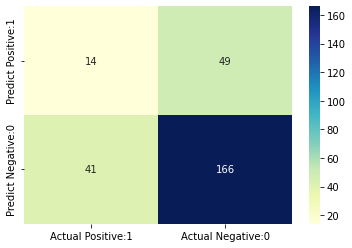

In [36]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.25      0.22      0.24        63
           1       0.77      0.80      0.79       207

    accuracy                           0.67       270
   macro avg       0.51      0.51      0.51       270
weighted avg       0.65      0.67      0.66       270



In [38]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [39]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.6667


In [40]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.3333


In [41]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.2222


In [42]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.2545


In [43]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.2545


In [44]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.2279


In [45]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.7721
